In [1]:
import os
import numpy as np
from base import *

In [2]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles python'
pthim = os.path.join(pth, '5x')
umpix = 2
pthtest = os.path.join(pth, 'testing images')
pthtestim = os.path.join(pthtest, '5x')
nm = 'CODA_python_09_11_2024_TA_matlab'

WS = [[0, 2, 0, 0, 0, 2, 0], [6, 7], 
      [1, 2, 3, 4, 5, 6, 7], 
      [7, 2, 5, 4, 3, 1, 6], [5]]

numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[0, 255, 0],
                  [23, 80, 150],
                  [150, 31, 23],
                  [199, 196, 147],
                  [23, 80, 151],
                  [255, 255, 255],
                  [242, 167, 227]])

classNames = ['bronchioles', 'alveoli', 'vasculature', 'mets', 'nonexpanded','whitespace','collagen']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Net file already exists, updating data...


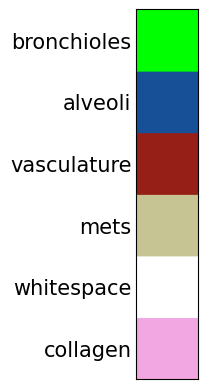

In [3]:
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate)

In [4]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
 
 Making down-sampled images...
All down-sampled images already exist in the directory.
Image 1 of 4: 2024-02-26 10.36.39
 annotation data previously loaded
Image 2 of 4: 84 - 2024-02-26 10.33.40
 annotation data previously loaded
Image 3 of 4: TVNTC 1-2 2
 annotation data previously loaded
Image 4 of 4: TVWT 4-1 1
 annotation data previously loaded


In [5]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 29303100.0 pixels of bronchioles, 8% of the most common class.
 There are 125561600.0 pixels of alveoli, 37% of the most common class.
 There are 20736100.0 pixels of vasculature, 6% of the most common class.
 There are 33200800.0 pixels of mets, 9% of the most common class.
 There are 335117300.0 pixels of whitespace. This is the most common class.
 There are 21986600.0 pixels of collagen, 6% of the most common class.

Building training tiles...
  Already done.
  Elapsed time to create training big tiles: 0.0h 0.0m 0.01699995994567871s


Building validation tiles...
Already done.
Elapsed time to create validation big tiles: 0.0h 0.0m 0.003999471664428711s


In [10]:
train_segmentation_model(pthDL, fine_tune=False)

TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Starting model training...
Epoch 1/8
165/500 [========>.....................] - ETA: 1:47 - loss: 0.2212 - accuracy: 0.9210

FailedPreconditionError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} NewRandomAccessFile failed to Create/Open: \\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles python\CODA_python_09_11_2024_TA_matlab\validation\im\190.png : The process cannot access the file because it is being used by another process.
; Broken pipe
	 [[{{node ReadFile}}]] [Op:IteratorGetNext]

In [ ]:
test_segmentation_model(pthDL,pthtest, pthtestim)

In [ ]:
classify_images(pthim,pthDL)

In [ ]:
quantify_images(pthDL, pthim)

In [9]:
# Install psutil if not already installed
# !pip install psutil

import psutil

def force_close_file(file_path):
    for proc in psutil.process_iter(['pid', 'name']):
        try:
            for item in proc.open_files():
                if item.path == file_path:
                    proc.terminate()
                    proc.wait()
                    print(f"Terminated process {proc.info['name']} (PID: {proc.info['pid']}) that was using the file.")
                    return
        except (psutil.NoSuchProcess, psutil.AccessDenied):
            continue
    print("No process found using the file.")

file_path = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles python\CODA_python_09_11_2024_TA_matlab\validation\im\190.png'
force_close_file(file_path)

No process found using the file.


In [13]:
import cv2
tif_path = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles MATLAB\lung_model_09102024_MATLAB\training\im'
save_path = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles python\CODA_python_09_11_2024_TA_matlab\training\im'
def covert_from_tif_to_png(tif_path, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    im_list = os.listdir(tif_path)
    for im in im_list:
        if im.endswith('.tif'):
            png_path = im.replace('.tif', '.png')
            img = cv2.imread(os.path.join(tif_path, im), cv2.IMREAD_UNCHANGED)
            print('Processing', im)
            cv2.imwrite(os.path.join(save_path, png_path), img)
    img = cv2.imread(tif_path, cv2.IMREAD_UNCHANGED)
    cv2.imwrite(png_path, img)
    
    
covert_from_tif_to_png(tif_path, save_path)

Processing 1.tif
Processing 2.tif
Processing 3.tif
Processing 4.tif
Processing 5.tif
Processing 6.tif
Processing 7.tif
Processing 8.tif
Processing 9.tif
Processing 10.tif
Processing 11.tif
Processing 12.tif
Processing 13.tif
Processing 14.tif
Processing 15.tif
Processing 16.tif
Processing 17.tif
Processing 18.tif
Processing 19.tif
Processing 20.tif
Processing 21.tif
Processing 22.tif
Processing 23.tif
Processing 24.tif
Processing 25.tif
Processing 26.tif
Processing 27.tif
Processing 28.tif
Processing 29.tif
Processing 30.tif
Processing 31.tif
Processing 32.tif
Processing 33.tif
Processing 34.tif
Processing 35.tif
Processing 36.tif
Processing 37.tif
Processing 38.tif
Processing 39.tif
Processing 40.tif
Processing 41.tif
Processing 42.tif
Processing 43.tif
Processing 44.tif
Processing 45.tif
Processing 46.tif
Processing 47.tif
Processing 48.tif
Processing 49.tif
Processing 50.tif
Processing 51.tif
Processing 52.tif
Processing 53.tif
Processing 54.tif
Processing 55.tif
Processing 56.tif
P

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [ ]:
import cv2
tif_path = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles MATLAB\lung_model_09102024_MATLAB\training\label'
save_path = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles python\CODA_python_09_11_2024_TA_matlab\training\label'
def covert_from_tif_to_png(tif_path, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    im_list = os.listdir(tif_path)
    for im in im_list:
        if im.endswith('.tif'):
            png_path = im.replace('.tif', '.png')
            img = cv2.imread(os.path.join(tif_path, im), cv2.IMREAD_UNCHANGED)
            print('Processing', im)
            cv2.imwrite(os.path.join(save_path, png_path), img)
    img = cv2.imread(tif_path, cv2.IMREAD_UNCHANGED)
    cv2.imwrite(png_path, img)
    
    
covert_from_tif_to_png(tif_path, save_path)

In [ ]:
import cv2
tif_path = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles MATLAB\lung_model_09102024_MATLAB\validation\im'
save_path = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles python\CODA_python_09_11_2024_TA_matlab\validation\im'
def covert_from_tif_to_png(tif_path, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    im_list = os.listdir(tif_path)
    for im in im_list:
        if im.endswith('.tif'):
            png_path = im.replace('.tif', '.png')
            img = cv2.imread(os.path.join(tif_path, im), cv2.IMREAD_UNCHANGED)
            print('Processing', im)
            cv2.imwrite(os.path.join(save_path, png_path), img)
    img = cv2.imread(tif_path, cv2.IMREAD_UNCHANGED)
    cv2.imwrite(png_path, img)
    
    
covert_from_tif_to_png(tif_path, save_path)

In [ ]:
import cv2
tif_path = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles MATLAB\lung_model_09102024_MATLAB\validation\label'
save_path = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\mouse lung\testfiles python\CODA_python_09_11_2024_TA_matlab\validation\label'
def covert_from_tif_to_png(tif_path, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    im_list = os.listdir(tif_path)
    for im in im_list:
        if im.endswith('.tif'):
            png_path = im.replace('.tif', '.png')
            img = cv2.imread(os.path.join(tif_path, im), cv2.IMREAD_UNCHANGED)
            print('Processing', im)
            cv2.imwrite(os.path.join(save_path, png_path), img)
    img = cv2.imread(tif_path, cv2.IMREAD_UNCHANGED)
    cv2.imwrite(png_path, img)
    
    
covert_from_tif_to_png(tif_path, save_path)